# Building a Naive Bayes Classifier Model


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
# Load cleaned and processed data

df = pd.read_csv('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Data/Cleaned_Processed_Data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Columns: 2478 entries, description_length to zone
dtypes: float64(2472), int64(5), object(1)
memory usage: 338.0+ MB


In [3]:
df.head()

,description_length,dominant_topic,telecommuting,has_company_logo,has_questions,fraudulent,ability,able,abroad,academic,...,yes,yet,york,youll,young,youre,youve,yr,zealand,zone
0,84,Topic 2,0,1,0,0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.148684,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,194,Topic 2,0,1,0,0,0.011488,0.013888,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30,Topic 5,0,1,0,0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,225,Topic 3,0,1,0,0,0.020885,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,131,Topic 3,0,1,1,0,0.000000,0.030983,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
numerical = ['telecommuting','has_company_logo','has_questions','description_length']
categorical = ['dominant_topic']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)],
         remainder= 'passthrough')

# Build pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", GaussianNB())
])

# Split data
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train model
NB_model =pipeline.fit(X_train, y_train)

In [13]:
# Evaluate model
y_pred = NB_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3395
           1       0.34      0.85      0.48       181

    accuracy                           0.91      3576
   macro avg       0.66      0.88      0.72      3576
weighted avg       0.96      0.91      0.93      3576

0.9082774049217002


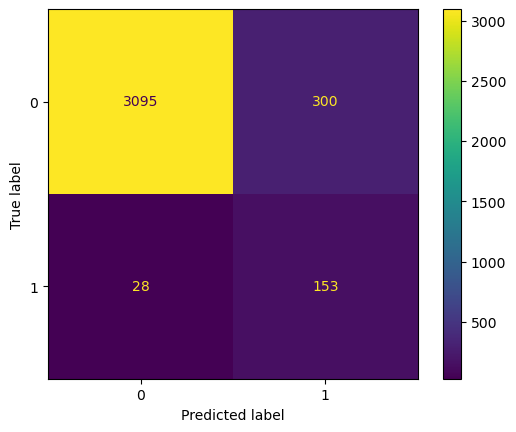

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


The model is good at predicting the majority class but needs help with predicting the minority class.

# Handling Class Imbalance with SMOTE 

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline 

smote = SMOTE(random_state=42, sampling_strategy=0.5)

# New pipeline with SMOTE

pipeline = ImbPipeline([
    ("preprocessor", preprocessor),
    ("smote", smote),
    ("classifier", GaussianNB())
])

# Split data
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with SMOTE included in pipeline
NB_model = pipeline.fit(X_train, y_train)



              precision    recall  f1-score   support

           0       0.99      0.94      0.97      3395
           1       0.43      0.78      0.55       181

    accuracy                           0.94      3576
   macro avg       0.71      0.86      0.76      3576
weighted avg       0.96      0.94      0.94      3576

0.9354026845637584


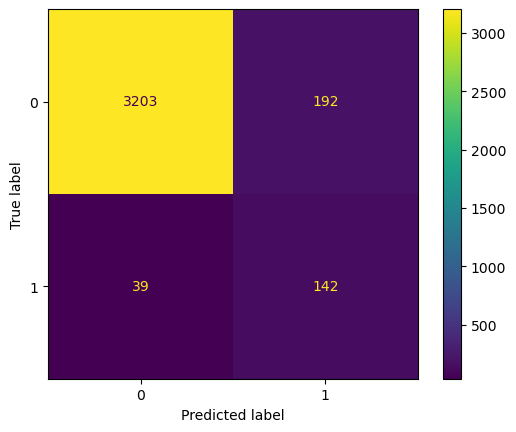

In [21]:
# Evaluate model performance
y_pred = NB_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)



Model performance has slightly improved. Accuracy is 93 and the F1 score is 76.